# Numpy -  arreglos de datos multidimensionales

Versión original en inglés de J.R. Johansson (robert@riken.jp) http://jrjohansson.github.io/.

Traducido/Adaptado por [G.F. Rubilar](http://google.com/+GuillermoRubilar).

La última versión de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/gfrubi/clases-python-cientifico](http://github.com/gfrubi/clases-python-cientifico).

La última versión del original (en inglés) de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Los otros notebooks de esta serie están listados en [http://jrjohansson.github.com](http://jrjohansson.github.com).

## Introducción

El paquete (módulo) `numpy` es usado en casi todos los cálculos numéricos usando Python. Es un paquete que provee a Python de estructuras de datos vectoriales, matriciales, y de rango mayor, de alto rendimiento. Está implementado en C y Fortran, de modo que cuando los cálculos son vectorizados (formulados con vectores y matrices), el rendimiento es muy bueno. 

Para usar `numpy` necesitamos importar el módulo usando, por ejemplo:

In [1]:
from numpy import *

En el paquete `numpy` la terminología usada para vectores, matrices y conjuntos de datos de dimensión mayor es la de un  *arreglo*. 

## Creando arreglos de `numpy`

Existen varias formas para inicializar nuevos arreglos de numpy, por ejemplo desde

* Listas o tuplas Python
* Usando funciones dedicadas a generar arreglos numpy, como `arange`, `linspace`, etc.
* Leyendo datos desde archivos

### Desde lista

Por ejemplo, para crear nuevos arreglos de matrices y vectores desde listas Python podemos usar la función `numpy.array`.


In [2]:
# un vector: el argumento de la función array es una lista de Python
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [3]:
# una matriz: el argumento de la función array es una lista anidada de Python
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

Los objetos `v` y `M` son ambos del tipo `ndarray` que provee el módulo `numpy`.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

La diferencia entre los arreglos `v` y `M` es sólo su forma. Podemos obtener información de la forma de un arreglo usando la propiedad `ndarray.shape`

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

El número de elementos de un arreglo puede obtenerse usando la propiedad `ndarray.size`:

In [7]:
M.size

4

Equivalentemente, podemos usar las funciones `numpy.shape` y `numpy.size`

In [8]:
shape(M)

(2, 2)

In [9]:
size(M)

4

Hasta el momento el arreglo `numpy.ndarray` luce como una lista Python (anidada). Entonces, ¿por qué simplemente no usar listas para hacer cálculos en lugar de crear un tipo nuevo de arreglo? 

Existen varias razones:

* Las listas Python son muy generales. Ellas pueden contener cualquier tipo de objeto. Sus tipos son asignados dinámicamente. Ellas no permiten usar funciones matemáticas tales como la multiplicación de matricies, el producto escalar, etc. El implementar tales funciones para las listas Python no sería muy eficiente debido a la asignación dinámica de su tipo.
* Los arreglos Numpy tienen tipo **estático** y **homogéneo**. El tipo de elementos es determinado cuando se crea el arreglo.
* Los arreglos Numpy son eficientes en el uso de memoria.
* Debido a su tipo estático, se pueden desarrollar implementaciones rápidas de funciones matemáticas tales como la multiplicación y la suma de arreglos `numpy` usando lenguajes compilados (se usan C y Fortran).

Usando la propiedad `dtype` (tipo de dato) de un `ndarray`, podemos ver qué tipo de dato contiene un arreglo:

In [10]:
M.dtype

dtype('int64')

Se obtiene un error si intentamos asignar un valor de un tipo equivocado a un elemento de un arreglo numpy:

In [11]:
M[0,0] = "hola"

ValueError: invalid literal for long() with base 10: 'hola'

Si lo deseamos, podemos definir explícitamente el tipo de datos de un arreglo cuando lo creamos, usando el argumento `dtype`: 

In [ ]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

Algunos tipos comunes que pueden ser usados con `dtype` son: `int`, `float`, `complex`, `bool`, `object`, etc.

Podemos también definir explícitamente el número de bit de los tipos de datos, por ejemplo: `int64`, `int16`, `float64`, `complex64`.

#### Usando funciones que generan arreglos

En el caso de arreglos más grandes no es práctico inicializar los datos manualmente, usando listas Python explícitas. En su lugar, podemos usar una de las muchas funciones en `numpy` que generan arreglos de diferentes formas. Algunos de los más comunes son:

#### arange

In [ ]:
# crea un arreglo con valores en un rango

x = arange(0, 10, 1) # argumentos: desde, hasta, paso

x

In [ ]:
x = arange(-1, 1, 0.1)

x

#### linspace y logspace

In [ ]:
# usando linspace, ambos puntos finales SON incluidos. Formato: (desde, hasta, número de elementos)
linspace(0, 10, 25) 

In [ ]:
# logspace también incluye el punto final. Por defecto base=10
logspace(0, 10, 11, base=e) # produce e elevado a cada valor en linspace(0, 10, 11), e.d.[e**0, e**1,...,e**10]

#### mgrid

In [ ]:
x, y = mgrid[0:5, 0:5] # similar a meshgrid en MATLAB

In [12]:
x

NameError: name 'x' is not defined

In [13]:
y

NameError: name 'y' is not defined

#### Datos aleatorios

In [14]:
from numpy import random

In [15]:
# números aleatorios uniformes en [0,1]
random.rand(2,5)

array([[ 0.5421664 ,  0.80497731,  0.36429653,  0.322732  ,  0.2163551 ],
       [ 0.2231955 ,  0.20464872,  0.76387013,  0.77729324,  0.2003914 ]])

In [16]:
# números aleatorios con distribución estándar normal (distribución gaussiana de media 0 y varianza 1).
random.randn(2,5)

array([[ 1.76909571,  1.17096506,  0.63397322, -0.29870071,  0.09362062],
       [-0.7230359 ,  0.4208798 ,  0.37588416, -0.19797453,  0.00318319]])

#### diag

In [17]:
# una matriz diagonal
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [18]:
# diagonal desplazada desde la diagonal principal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### ceros y unos

In [19]:
zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [20]:
ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Entrada/Salida desde/hasta archivos


### Valores separados por coma (Comma-separated values, CSV)

Un formato muy común para archivos de datos es el de valores separados por comas, o formatos relacionados, como por ejemplo TSV (tab-separated values, valores separados por tabs). Para leer datos desde tales archivos a un arreglo Numpy podemos usar la función `numpy.genfromtxt`. Por ejemplo, 

In [21]:
!head stockholm_td_adj.dat # despliega las primeras líneas del archivo stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [22]:
data = genfromtxt('stockholm_td_adj.dat')  # asigna los datos del archivo al arreglo data

In [23]:
data.shape

(77431, 7)

In [24]:
# ¿qué hace esta línea?. La respuesta en la clase 4
%matplotlib inline
from matplotlib.pyplot import *

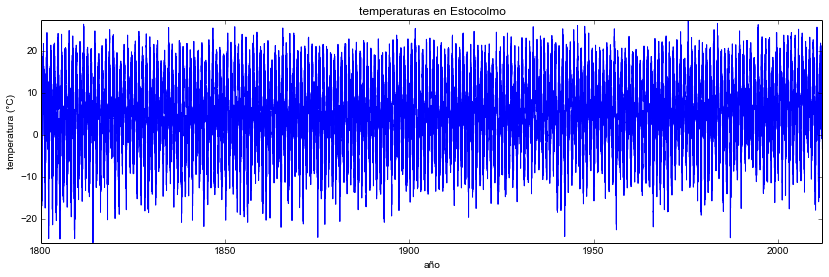

In [25]:
fig, ax = subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('temperaturas en Estocolmo')
ax.set_xlabel(u'año')
ax.set_ylabel(u'temperatura (°C)');

Usando `numpy.savetxt` podemos almacenar un arreglo Numpy a un archivo en formato CSV:

In [26]:
M = random.rand(3,3)

M

array([[ 0.71917719,  0.25282947,  0.57017201],
       [ 0.47082652,  0.30021729,  0.51052492],
       [ 0.38195762,  0.97185082,  0.81447527]])

In [27]:
savetxt("matriz-aleatoria.csv", M)

In [28]:
!cat matriz-aleatoria.csv

7.191771928771565348e-01 2.528294684525156377e-01 5.701720121608914171e-01
4.708265166542224822e-01 3.002172870758357259e-01 5.105249231389386022e-01
3.819576170911789248e-01 9.718508247167131353e-01 8.144752737532305886e-01


In [29]:
savetxt("matriz-aleatoria.csv", M, fmt='%.5f') # fmt especifica el formato

!cat matriz-aleatoria.csv

0.71918 0.25283 0.57017
0.47083 0.30022 0.51052
0.38196 0.97185 0.81448


### El formato de archivo nativo de Numpy

Es útil cuando se almacenan arreglos de datos y luego se leen nuevamente con numpy. Use las funciones `numpy.save` y `numpy.load`:

In [30]:
save("matriz-aleatoria.npy", M)

!file matriz-aleatoria.npy

matriz-aleatoria.npy: data


In [31]:
load("matriz-aleatoria.npy")

array([[ 0.71917719,  0.25282947,  0.57017201],
       [ 0.47082652,  0.30021729,  0.51052492],
       [ 0.38195762,  0.97185082,  0.81447527]])

## Más propiedades de los arreglos Numpy

In [32]:
M.itemsize # los bits de cada elemento

8

In [33]:
M.nbytes # número de bytes

72

In [34]:
M.ndim # número de dimensiones

2

## Manipulando arreglos

### Indexando

Podemos indexar elementos en un arreglo usando paréntesis cuadrados e índices:

In [35]:
# v es un vector, tiene por lo tanto sólo una dimensión, y requiere un índice
v[0]

1

In [36]:
# M es una matriz, es decir un arreglo bidimensional, requiere dos índices
M[1,1]

0.30021728707583573

Si omitimos un índice de una arreglo multidimensional Numpy entrega la fila completa (o, en general, al arreglo de dimensión N-1 correspondiente) 

In [37]:
M

array([[ 0.71917719,  0.25282947,  0.57017201],
       [ 0.47082652,  0.30021729,  0.51052492],
       [ 0.38195762,  0.97185082,  0.81447527]])

In [38]:
M[1]

array([ 0.47082652,  0.30021729,  0.51052492])

Puede obtenerse lo mismo usando `:` en el lugar de un índice: 

In [39]:
M[1,:] # fila 1

array([ 0.47082652,  0.30021729,  0.51052492])

In [40]:
M[:,1] # columna 1

array([ 0.25282947,  0.30021729,  0.97185082])

Podemos asignar nuevos valores a los elementos de un arreglo usando el indexado:

In [41]:
M[0,0] = 1

In [42]:
M

array([[ 1.        ,  0.25282947,  0.57017201],
       [ 0.47082652,  0.30021729,  0.51052492],
       [ 0.38195762,  0.97185082,  0.81447527]])

In [43]:
# también funciona para filas y columnas completas
M[1,:] = 0
M[:,2] = -1

In [44]:
M

array([[ 1.        ,  0.25282947, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.38195762,  0.97185082, -1.        ]])

## Corte de índices

Corte (slicing) de índices es el nombre para la sintaxis `M[desde:hasta:paso]` para extraer una parte de un arreglo:

In [45]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [46]:
A[1:3]

array([2, 3])

Los cortes de índices son *mutables*: si se les asigna un nuevo valor el arreglo original es modificado:

In [47]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

Podemos omitir cualquiera de los tres parámetros en  `M[desde:hasta:paso]`:

In [48]:
A[::] # desde, hasta y paso asumen los valores por defecto

array([ 1, -2, -3,  4,  5])

In [49]:
A[::2] # el paso es 2, desde y hasta se asumen desde el comienzo hasta el fin del arreglo

array([ 1, -3,  5])

In [50]:
A[:3] # primeros tres elementos

array([ 1, -2, -3])

In [51]:
A[3:] # elementos desde el índice 3

array([4, 5])

Los índices negativos se cuentan desde el fin del arreglo (los índices positivos desde el comienzo):

In [52]:
A = array([1,2,3,4,5])

In [53]:
A[-1] # el último elemento del arreglo

5

In [54]:
A[-3:] # los últimos 3 elementos

array([3, 4, 5])

El corte de índices funciona exactamente del mismo modo para arreglos multidimensionales:

In [55]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [56]:
# un bloque parte del arreglo original
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [57]:
# elemento por medio
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Indexado Fancy

Se llama indexado fancy cuando una arreglo o una lista es usado en lugar de un índice: 

In [58]:
indices_fila = [1, 2, 3]
A[indices_fila]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [59]:
indices_col = [1, 2, -1] # recuerde que el índice -1 corresponde al último elemento
A[indices_fila, indices_col]

array([11, 22, 34])

Podemos también usar máscaras de índices: Si la máscara de índice es un arreglo Numpy con tipo de dato booleano (`bool`), entonces un elemento es seleccionado (True) o no (False) dependiendo del valor de la máscara de índice en la posición de cada elemento: 

In [60]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [61]:
masc_fila = array([True, False, True, False, False])
B[masc_fila]

array([0, 2])

In [62]:
# lo mismo
masc_fila = array([1,0,1,0,0], dtype=bool)
B[masc_fila]

array([0, 2])

Esta característica es muy útil para seleccionar en forma condicional elementos de un arreglo, usando por ejemplo los operadores de comparación:

In [63]:
x = arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [64]:
masc = (5 < x) * (x < 7.5)

masc

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [65]:
x[masc]

array([ 5.5,  6. ,  6.5,  7. ])

## Funciones para extraer información desde arreglos y para crear nuevos arreglos

#### where

Las máscaras de índices pueden ser convertidas en posiciones de índices usando la función `where` (dónde):

In [66]:
indices = where(masc)

indices

(array([11, 12, 13, 14]),)

In [67]:
x[indices] # este indexado es equivalente al indexado fancy x[masc]

array([ 5.5,  6. ,  6.5,  7. ])

#### diag

Con la función diag podemos extraer la diagonal y las subdiagonales de un arreglo:

In [68]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [69]:
diag(A, -1)

array([10, 21, 32, 43])

#### take

La función `take` es similar al indexado fancy descrito anteriormente:

In [70]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [71]:
indices_fila = [1, 3, 5]
v2[indices_fila] # indexado fancy

array([-2,  0,  2])

In [72]:
v2.take(indices_fila)

array([-2,  0,  2])

Pero la función `take` también funciona sobre listas y otros objetos:

In [73]:
take([-3, -2, -1,  0,  1,  2], indices_fila)

array([-2,  0,  2])

#### choose

Construye un arreglo tomando elementos desde varios arreglos:

In [74]:
cuales = [1, 0, 1, 0]
posibilidades = [[-2,-2,-2,-2], [5,5,5,5]]

choose(cuales, posibilidades)

array([ 5, -2,  5, -2])

## Álgebra lineal

El vectorizar el código es la clave para realizar cálculos numéricos eficientes usando Python/Numpy. Esto significa que la mayor parte de un programa debería ser formulado en términos de operaciones con matrices y vectores, como por ejemplo la multiplicación de matrices.

### Operaciones escalar-arreglo

Podemos usar los operadores aritméticos usuales para multiplicar, sumar, restar, y dividir arreglos por números (escalares):

In [75]:
v1 = arange(0, 5)

In [76]:
2*v1

array([0, 2, 4, 6, 8])

In [77]:
v1 + 2

array([2, 3, 4, 5, 6])

In [78]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Operaciones elemento a elemento entre arreglos

Cuando sumamos, sustraemos, multiplicados y dividimos dos arreglos, el comportamiento por defecto es operar **elemento a elemento**:

In [79]:
A * A # multiplicación elemento a elemento

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [80]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Si multiplicamos arreglos con formas compatibles, obtenemos una multiplicación elemento a elemento de cada fila:

In [81]:
A.shape, v1.shape

((5, 5), (5,))

In [82]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Álgebra matricial

¿Y la multiplicación de matrices? Podemos realizarla de dos formas. Podemos usar la función `dot`, que aplica una multiplicación matriz-matriz, matriz-vector o un producto interno entre vectores a sus dos argumentos: 

In [83]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [84]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [85]:
dot(v1, v1)

30

Alternativamente, podemos transformar el arreglo al tipo `matrix`. Esto cambia el comportamiento de los operadores aritméticos estándar `+, -, *` al de álgebra de matrices.

In [86]:
M = matrix(A)
v = matrix(v1).T # aplica la traspuesta, convirtiéndolo en vector columna

In [87]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [88]:
M*M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [89]:
M*v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [90]:
# productor interior
v.T * v

matrix([[30]])

In [91]:
# con objetos matriciales, el álgebra matricial estándar es usada
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Si intentamos sumar, restar, o multiplicar objetos con formas incompatibles, obtendremos un error:

In [92]:
v = matrix([1,2,3,4,5,6]).T

In [93]:
shape(M), shape(v)

((5, 5), (6, 1))

In [94]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

Vea también las funciones relacionadas: `inner`, `outer`, `cross`, `kron`, `tensordot`. Por ejemplo, introduzca `help(kron)`.

### Transformaciones de arreglos/matrices

Antes hemos usado `.T` para transponer un vector `v`. Podemos también usar la función `transpose` para conseguir el mismo resultado. 

Otras funciones matemáticas que transforman objetos matriciales son:

In [110]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [111]:
conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Hermítico conjugado: transpuesta + conjugado

In [112]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Podemos extraer las partes reales e imaginarias de un arreglo con elementos complejos usando `real` y `imag`:

In [113]:
real(C) # lo mismo que: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [114]:
imag(C) # lo mismo que: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Podemos también extraer el módulo y el argumento complejo

In [115]:
angle(C+1) # Atención usuarios de MATLAB, se usa angle en lugar de arg

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [116]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Cálculos con matrices

#### Inversa

In [117]:
linalg.inv(C) # equivalente a C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [118]:
C.I * C

matrix([[  1.00000000e+00+0.j,   4.44089210e-16+0.j],
        [  0.00000000e+00+0.j,   1.00000000e+00+0.j]])

#### Determinante

In [119]:
linalg.det(C)

(2.0000000000000004+0j)

In [120]:
linalg.det(C.I)

(0.50000000000000011+0j)

### Cálculos con datos

A menudo es útil almacenar datos en arreglos Numpy. Numpy provee funciones para realizar cálculos estadísticos de los datos en un arreglo. 

Por ejemplo, calculemos algunas propiedades de los datos de la temperatura de Estocolmo que discutimos anteriormente.

In [121]:
# recuerde, los datos de la temperatura están almacenados en la variable data
shape(data)

(77431, 7)

#### mean

In [122]:
# la temperatura está almacenada en la columna 3
mean(data[:,3])

6.1971096847515854

La temperatura diaria promedio en Estocolmo en los últimos 200 años ha sido aproximadamente 6.2 C.

#### Desviación estándar y varianza

In [123]:
std(data[:,3]), var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### min and max

In [124]:
# valor mínimo del promedio diario de temperatura. Lo mismo que min(data[:,3])
data[:,3].min()

-25.800000000000001

In [125]:
# valor máximo del promedio diario de temperatura. Lo mismo que max(data[:,3])
data[:,3].max()

28.300000000000001

#### sum, prod, and trace

In [126]:
d = 1 + arange(0, 10)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [127]:
# suma todos los elementos
sum(d)

55

In [128]:
# multiplica todos los elementos
prod(d)

3628800

In [129]:
# suma acumulativa
cumsum(d)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [130]:
# producto acumulativo
cumprod(d)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [131]:
# lo mismo que: diag(A).sum()
trace(A)

110

### Cálculos con subconjuntos de un arreglo

Podemos calcular usando subconjuntos de los datos de un arreglo usando el indexado, indexado fancy, y los otros métodos para extraer datos desde un arreglo (descrito más arriba).

Por ejemplo, consideremos nuevamente los datos de temperatura de Estocolmo:

In [132]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


El formato de los datos es: año, mes, día, temperatura promedio diaria, mínima, máxima, lugar.

Si estamos interesados sólo en la temperatura promedio de un mes particular, Febrero por ejemplo, podemos crear una máscara de índice y seleccionar sólo los datos de ese mes usando:

In [133]:
unique(data[:,1]) # la columna mes asume valores entre 1 y 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [134]:
masc_feb = (data[:,1] == 2) # los paréntesis () son opcionales

In [135]:
# los datos de temperatura están en la columna 3
mean(data[masc_feb,3])

-3.2121095707365961

Estas funciones ponen a nuestra disposición herramientas muy poderosas para procesar datos. Por ejemplo, para extraer las temperaturas promedio mensuales para cada mes del año sólo necesitamos unas pocas líneas de código: 

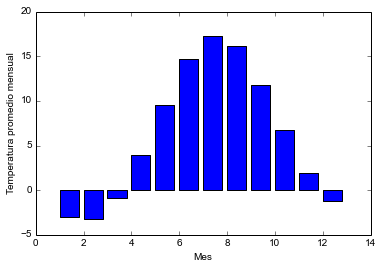

In [136]:
meses = arange(1,13)
media_mensual = [mean(data[data[:,1] == mes, 3]) for mes in meses]

fig, ax = subplots()
ax.bar(meses, media_mensual)
ax.set_xlabel("Mes")
ax.set_ylabel("Temperatura promedio mensual");

### Cálculos con datos multidimensionales

Cuando se aplican funciones como `min`, `max`, etc., a arreglos multidimensionales, a veces se desea aplicarlas al arreglo completo, y en otras ocasiones sólo por filas o columnas. Podemos especificar cómo se comportan estas funciones usando el argumento `axis` (eje): 

In [137]:
m = random.rand(3,3)
m

array([[ 0.60959916,  0.51496133,  0.89085195],
       [ 0.20147089,  0.64100653,  0.39383738],
       [ 0.02230134,  0.77013792,  0.78870679]])

In [138]:
# máximo global
m.max()

0.89085195401675488

In [139]:
# máximo en cada columna
m.max(axis=0)

array([ 0.60959916,  0.77013792,  0.89085195])

In [140]:
# máximo en cada fila
m.max(axis=1)

array([ 0.89085195,  0.64100653,  0.78870679])

Muchas otras funciones y métodos de las clases `array` y `matrix` aceptan el argumento (optional) `axis`.

## Cambiando la forma, redimensionando y apilando arreglos

La forma de un arreglo Numpy puede ser modificada sin copiar las datos involucrados, lo que hace que esta operación sea rápida, incluyo con arreglos grandes.

In [141]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [142]:
n, m = A.shape

In [143]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [144]:
B[0,0:5] = 5 # modifica el arreglo

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [145]:
A # la variable original es también cambiada. B sólo constituye una forma distinta de ver los mismos datos

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Podemos también usar la función `flatten` para transformar un arreglo multidimensional a un vector. A diferencia de `reshape` esta función crea una copia de los datos.

In [146]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [147]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [148]:
A # ahora A no ha cambiado, ya que los datos de B han sido duplicados desde A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

### Agregando una dimensión adicional: `newaxis`

Con `newaxis`, podemos insertar una nueva dimension en un arreglo, por ejemplo, para convertir un vector en la fila o columna de una matriz:

In [149]:
v = array([1,2,3])

In [150]:
shape(v)

(3,)

In [151]:
# crea una matriz con el vector v como su columna
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [152]:
# matriz columna
v[:,newaxis].shape

(3, 1)

In [153]:
# matriz fila
v[newaxis,:]

array([[1, 2, 3]])

In [154]:
v[newaxis,:].shape

(1, 3)

### Apilando y repitiendo arreglos

Podemos crear vectores y matrices más grandes a partir de otras más pequeñas usando las funcionesn `repeat` (repetir), `tile` (teselar, "embaldosar"), `vstack` (apilar verticalmente), `hstack` (apilar horizontalmente), y `concatenate` (concatenar):

#### tile y repeat

In [155]:
a = array([[1, 2], [3, 4]])

In [156]:
# repite cada elemente 3 veces
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [157]:
# repite la matriz 3 veces
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### concatenate

In [158]:
b = array([[5, 6]])

In [159]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [160]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

#### hstack and vstack

In [161]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [162]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy y "deep copy"

Para alcarzar un alto deseméño, las asignaciones en Python usualmente no copian los objetos involucrados. Esto es importante cuando se pasan objetos a funciones, para así evitar uso excesivo de memoria copiando cuando no es necesario (término técnico: paso por referencia)

In [163]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [164]:
# ahora B apunta al mismo arreglo que A
B = A 

In [165]:
# cambiar B afecta a A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [166]:
A

array([[10,  2],
       [ 3,  4]])

Si queremos evitar este comportamiento, para así obtener un nuevo objecto `B` copiado desde `A`, pero totalmente independiente de `A`, necesitamos realizar una "copia produnfa" ("deep copy") usando la función `copy`:

In [167]:
B = copy(A)

In [168]:
# ahora A no cambia si modificamos B
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [169]:
A

array([[10,  2],
       [ 3,  4]])

## Iterando sobre elementos de un arreglo

Generalmente, deseamos evitar iterar sobre los elementos de un arreglo donde sea posible (a cualquier precio!). La razón es que en un lenguaje interpretado como Python (o MATLAB), las iteraciones son realmente lentas comparadas con las operaciones vectorizadas. 

Sin embargo, algunas veces es ineludible. En tales cases el bucle Python `for` es la forma más conveniente para iterar sobre un arreglo:

In [170]:
v = array([1,2,3,4])

for elemento in v:
    print elemento

1
2
3
4


In [171]:
M = array([[1,2], [3,4]])

for fila in M:
    print "fila", fila
    
    for elemento in fila:
        print elemento

fila [1 2]
1
2
fila [3 4]
3
4


Cuando necesitamos iterar sobre cada elemento de un arreglo y modificar sus elementos, es conveniendo usar la función `enumerate` para obtener tanto el elemento como su índice en el bucle `for`: 

In [172]:
for ind_fila, fila in enumerate(M):
    print "ind_fila", ind_fila, "fila", fila
    
    for ind_colu, elemento in enumerate(fila):
        print "ind_colu", ind_colu, "elemento", elemento
       
        # actualiza la matriz: eleva al cuadrado cada elemento
        M[ind_fila, ind_colu] = elemento**2

ind_fila 0 fila [1 2]
ind_colu 0 elemento 1
ind_colu 1 elemento 2
ind_fila 1 fila [3 4]
ind_colu 0 elemento 3
ind_colu 1 elemento 4


In [173]:
# cada elemento en M está ahora al cuadrado
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizando funciones

Como se ha mencionado en varias ocasiones, para obtener un buen rendimiento deberíamos tratar de evitar realizar bucles sobre los elementos de nuestros vectores y matrices, y en su lugar usar algoritmos vectorizados. El primer paso para convertir un algoritmo escalar a uno vectorizado es asegurarnos que las funciones que escribamos funcionen con argumentos vectoriales.

In [174]:
def Theta(x):
    """
    implementación escalar de la función escalón de Heaviside.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [175]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Ok, eso no funcionó porque no definimos la función `Theta` de modo que pueda manejar argumentos vectoriales... 

Para obtener una version vectorizada de Theta podemos usar la función `vectorize` de Numpy. En muchos casos, puede vectorizar automáticamente una función:

In [176]:
Theta_vec = vectorize(Theta)

In [177]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Podemos también implementar la función de modo que desde el comienzo acepte un argumento vectorial (esto requiere más esfuerzo, pero mejorar el rendimiento):

In [178]:
def Theta(x):
    """
    Implementación preparada para vectores de la función escalón de Heaviside.
    """
    return 1 * (x >= 0)

In [179]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [180]:
# y también funciona para escalares!
Theta(-1.2), Theta(2.6)

(0, 1)

## Usando arreglos en sentencias condicionales

Cuando se usan arreglos en sentencias condicionales, por ejemplo en sentencias `if` y otras expresiones booleanas, necesitamos usar `any` o bien `all`, que requiere que todos los elementos de un arreglo se evalúen con `True`:

In [181]:
M

array([[ 1,  4],
       [ 9, 16]])

In [182]:
if (M > 5).any():
    print "al menos un elemento de M es mayor que 5"
else:
    print "ningún elemento de M es mayor que 5"

al menos un elemento de M es mayor que 5


In [183]:
if (M > 5).all():
    print "todos los elementos de M son mayores que 5"
else:
    print "no todos los elementos de M son mayores que 5"

no todos los elementos de M son mayores que 5


## Conversión de tipo

Como los arreglos de Numpy son *de tipo estático*, el tipo de un arrglo no puede ser cambiado luego de que es creado. Sin embarg, podemos convertir explícitamente un arreglo de un tipo a otro usando las funciones `astype` (ver también las funciones similares `asarray`). Esto crea un nuevo arreglo de un nuevo tipo:

In [184]:
M.dtype

dtype('int64')

In [185]:
M2 = M.astype(float)

M2

array([[  1.,   4.],
       [  9.,  16.]])

In [186]:
M2.dtype

dtype('float64')

In [187]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## Lectura adicional

* [Numpy](http://numpy.scipy.org)
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - Una guía de Numpy para usuario de MATLAB.